In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import cmath

In [2]:
dictionary = pkl.load(open('lab12data/graph_sp_data.pkl', 'rb'))
A = dictionary['A']
x1 = dictionary['x1']
x2 = dictionary['x2']
x3 = dictionary['x3']
y = dictionary['y']

In [3]:
class matrix:
    def __init__(self,N):
        self.N=N

class directCycle(matrix):
    def __init__(self,N):
        super().__init__(N)
        self.A=np.tril(np.ones((self.N,self.N)),-1)-np.tril(np.ones((self.N,self.N)),-2)
        self.A[0,self.N-1] = 1

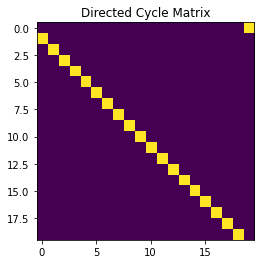

In [5]:
N = 20
dirCyc=mat.directCycle(N)
plt.imshow(dirCyc.A)
plt.title('Directed Cycle Matrix')
plt.savefig('dirCycle.png')

In [6]:
class fourier(matrix):
    def __init__(self,N):
        super().__init__(N)
        self.F=np.outer(np.arange(self.N),np.arange(self.N))
        self.F=(1/np.sqrt(N))*np.exp(2j*cmath.pi*self.F / self.N)

Text(0.5, 1.0, 'Imaginary Part of Fourier Basis Matrix')

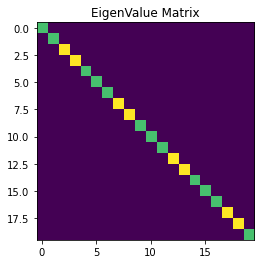

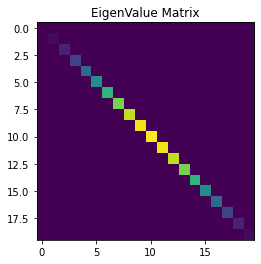

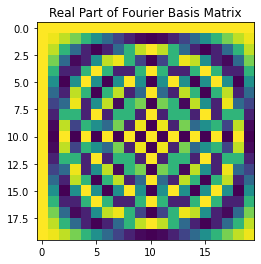

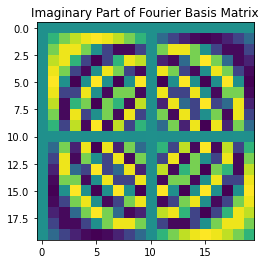

In [7]:
plt.figure()
fourier=mat.fourier(N)
plt.imshow(np.abs(np.round(np.conjugate(fourier.F)@dirCyc.A@fourier.F)))
plt.title('EigenValue Matrix')

plt.figure()
S2 = np.add(np.diag(sum((dirCyc.A+dirCyc.A.T))) ,  -1*(dirCyc.A+dirCyc.A.T) )
plt.imshow(np.abs((np.conjugate(fourier.F) @ S2 @ fourier.F)))
plt.title('EigenValue Matrix')

plt.figure()
fourier = mat.fourier(N)
plt.imshow(np.real(fourier.F))
plt.title('Real Part of Fourier Basis Matrix')

plt.figure()
fourier = mat.fourier(N)
plt.imshow(np.imag(fourier.F))
plt.title('Imaginary Part of Fourier Basis Matrix')

2.2.

The matrix $\Lambda_1$ is a diagonal matrix shown above. This shows that each of the columns of the Hermitian of the Fourier matrix $F^H$ are eigenvectors of $S_1$.

In this particular graph-shift operator, we see that node 1 influences node 2, node 2 influences node 3 and follows. This means that the graph is a path like a time graph. This linear form is why DFT and GFT are equivalent. As we know DFT is $Fx$ and GFT is $V^H x$, $V = F^H$.

$S_2$ has the same conclusion as $S_1$ because $\Lambda_1$ and $\Lambda_2$ should have the same structure being a eigenvalue diagonal matrix. As $\Lambda_i = FS_i F^H$ for both i = 1,2, $S_1$ has the same structure as $S_2$. As $S_2$ also has a diagonal matrix, it creates a path graph so DFT and GFT are also the same.

In [8]:
class GFT:
    def __init__(self,S):
        self.S=S
        [self.eigs,self.V]=np.linalg.eig(S)
        self.V=self.V[:,np.argsort(self.eigs)]
        self.eigs=np.sort(self.eigs)
        self.Lambda=np.diag(self.eigs)

    def computeGFT(self,x,k=None):
        xt=np.conj(self.V.T) @ x
        if k==None:
            return xt
        else:
            xtk = np.zeros_like(xt)
            xtk[np.argsort(np.abs(xt[:, 0]))[-k:], 0] = xt[np.argsort(np.abs(xt[:, 0]))[-k:], 0]
            return xtk

    def computeiGFT(self,xt, k=None):
        if k==None:
            return self.V@xt
        else:
            return self.V[:,np.argsort(np.abs(xt[:,0]))[-k:]]@xt[np.argsort(np.abs(xt[:,0]))[-k:],0]

    def computeTotalVariation(self,x):
        return x.T@(self.S)@x

The multiplicity is: 1


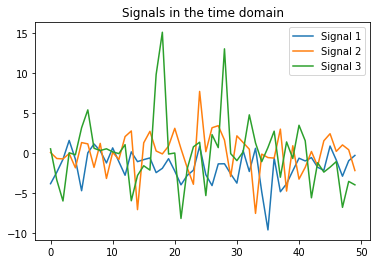

In [9]:
L = np.add(np.diag(sum(A)) ,  -1*A ) # Compute laplacian
p32=graphFT.GFT(L)
print('The multiplicity is:', np.sum( np.abs(p32.eigs) < (10**(-10))))
plt.figure()
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)
plt.legend(['Signal 1', 'Signal 2', 'Signal 3'])
plt.title('Signals in the time domain')
plt.savefig('LAB12_signals_time.png')

3.2

The graph has one signal knowing the multiplicity of the eigenvalue 0, which is 1 as it is the same as the number of connected components.

Of the three signals plotted in the time domain would not give a distinct answer to what signal is faster as shown in the graph.

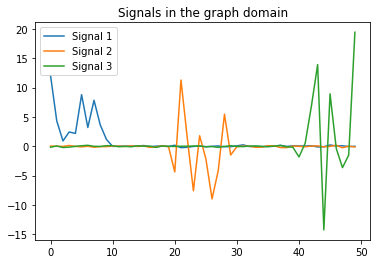

In [10]:
x1t = p32.computeGFT(x1)
x2t = p32.computeGFT(x2)
x3t = p32.computeGFT(x3)
plt.figure()
plt.plot(x1t)
plt.plot(x2t)
plt.plot(x3t)
plt.legend(['Signal 1', 'Signal 2', 'Signal 3'])
plt.title('Signals in the graph domain')
plt.savefig('LAB12_signals_graph.png')

3.3

However, using GFT, we can extract the information about the signals and convert them into the frequency domain, where we can clearly see that signal 3 $(x^\sim_3)$ varies faster in the graph with higher-order frequencies in the GFT graph. The slowest variation is from signal 1 $(x^\sim_1)$ that is in the smaller end of the frequency domain and signal 2 $(x^\sim_2)$ in the middle.

In [11]:
print('The Total Variation of Signal 1 is:',p32.computeTotalVariation(x1))
print('The Total Variation of Signal 2 is:',p32.computeTotalVariation(x2))
print('The Total Variation of Signal 3 is:',p32.computeTotalVariation(x3))

The Total Variation of Signal 1 is: [[241.79931345]]
The Total Variation of Signal 2 is: [[1385.61080034]]
The Total Variation of Signal 3 is: [[8761.27684875]]


3.4\
Yes, the results from the Laplachian quadratic form confirm the intuition from 3.3. Signal 3 $(x^\sim_3)$ has a variation value of over 8000 while Signal 1’s $(x^\sim_1)$ value is only 241 compared to Signal 2’s $(x^\sim_2)$ 1385.

In [12]:
print('The reconstruction error of signal 1 is:',np.linalg.norm(x1-p32.computeiGFT(p32.computeGFT(x1))))
print('The reconstruction error of signal 2 is:',np.linalg.norm(x2-p32.computeiGFT(p32.computeGFT(x2))))
print('The reconstruction error of signal 3 is:',np.linalg.norm(x3-p32.computeiGFT(p32.computeGFT(x3))))


The reconstruction error of signal 1 is: 7.355852543911045e-14
The reconstruction error of signal 2 is: 2.3329589031140633e-13
The reconstruction error of signal 3 is: 2.6814555814623045e-13


The reconstruction error of signal 1 with k=  5 coeffcients is: 135.21348969408197
The reconstruction error of signal 2 with k=  5 coeffcients is: 181.5216884559934
The reconstruction error of signal 3 with k=  5 coeffcients is: 302.05731299025564


Text(0.5, 1.0, 'Complete Graph Fourier Transform of Signal 3 and using k=5 coefficients')

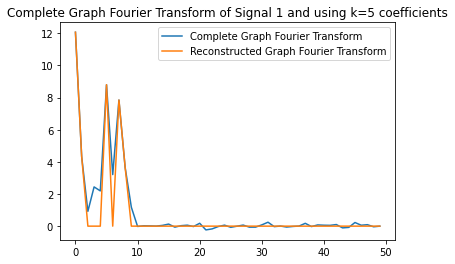

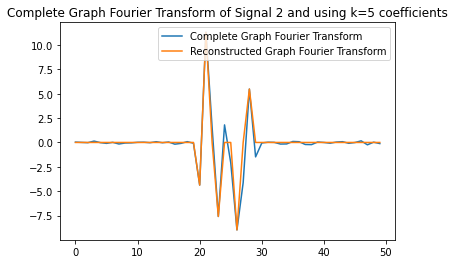

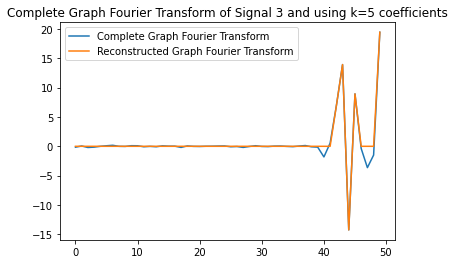

In [13]:
k=5
print('The reconstruction error of signal 1 with k= ', k, 'coeffcients is:', np.linalg.norm(x1 - p32.computeiGFT(x1t,k)))
print('The reconstruction error of signal 2 with k= ', k, 'coeffcients is:', np.linalg.norm(x2 - p32.computeiGFT(x2t,k)))
print('The reconstruction error of signal 3 with k= ', k, 'coeffcients is:', np.linalg.norm(x3 - p32.computeiGFT(x3t,k)))

plt.figure()
plt.plot(p32.computeGFT(x1))
plt.plot(p32.computeGFT(x1,k))
plt.legend(['Complete Graph Fourier Transform', 'Reconstructed Graph Fourier Transform'])
plt.title('Complete Graph Fourier Transform of Signal 1 and using k=%d coefficients' % k)

plt.figure()
plt.plot(p32.computeGFT(x2))
plt.plot(p32.computeGFT(x2,k))
plt.legend(['Complete Graph Fourier Transform', 'Reconstructed Graph Fourier Transform'])
plt.title('Complete Graph Fourier Transform of Signal 2 and using k=%d coefficients' % k)

plt.figure()
plt.plot(p32.computeGFT(x3))
plt.plot(p32.computeGFT(x3, k))
plt.legend(['Complete Graph Fourier Transform', 'Reconstructed Graph Fourier Transform'])
plt.title('Complete Graph Fourier Transform of Signal 3 and using k=%d coefficients' % k)

Text(0.5, 1.0, 'Signal and denoised signal using k=3 coefficients')

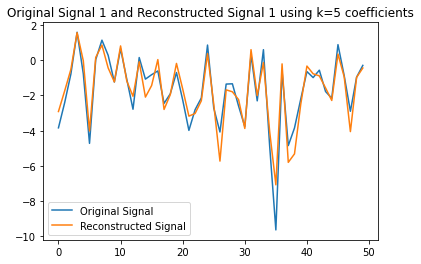

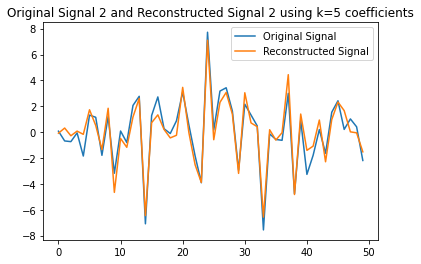

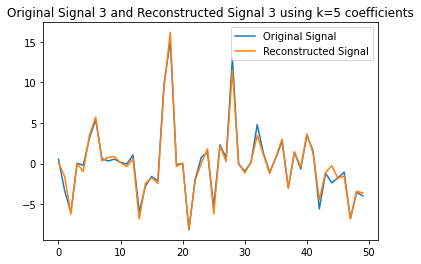

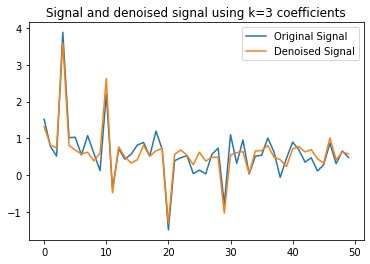

In [14]:
plt.figure()
plt.plot(x1)
plt.plot(p32.computeiGFT(p32.computeGFT(x1),k))
plt.legend(['Original Signal','Reconstructed Signal'])
plt.title('Original Signal 1 and Reconstructed Signal 1 using k=%d coefficients'%k)

plt.figure()
plt.plot(x2)
plt.plot(p32.computeiGFT(p32.computeGFT(x2),k))
plt.legend(['Original Signal','Reconstructed Signal'])
plt.title('Original Signal 2 and Reconstructed Signal 2 using k=%d coefficients'%k)

plt.figure()
plt.plot(x3)
plt.plot(p32.computeiGFT(p32.computeGFT(x3),k))
plt.legend(['Original Signal','Reconstructed Signal'])
plt.title('Original Signal 3 and Reconstructed Signal 3 using k=%d coefficients'%k)

yt=p32.computeGFT(y)
yr=p32.computeiGFT(yt,3)
plt.figure()
plt.plot(y)
plt.plot(yr)
plt.legend(['Original Signal','Denoised Signal'])
plt.title('Signal and denoised signal using k=3 coefficients')

3.6\
 We would keep the 5 coefficients with the largest absolute value. The fact that the eigenvectors are orthogonal allows us to compute the energy of reconstruction error without actually performing the reconstruction.